In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from numpy import polyfit, poly1d

# Cryptocurrency Dataset Features
```
date : time of observation
price: price at observation point
market_cap : market capitalization in USD (how much bitcoin/doge are actually worth)
total_volume : volume of transactions on the given day
```
(from https://www.coingecko.com/en/coins/dogecoin/historical_data/usd and https://www.coingecko.com/en/coins/bitcoin/historical_data/usd#panel)

## Bitcoin Dataset

In [2]:
BTC = pd.read_csv (r'btc-usd-max.csv')
BTC.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [3]:
# view range of bitcoin data
BTC.tail()

,snapped_at,price,market_cap,total_volume
2953,2021-05-31 00:00:00 UTC,35714.752020,6.686643e+11,3.065027e+10
2954,2021-06-01 00:00:00 UTC,37340.679266,6.991386e+11,3.795080e+10
2955,2021-06-02 00:00:00 UTC,36680.068202,6.887264e+11,3.353691e+10
2956,2021-06-03 00:00:00 UTC,37685.717982,7.045313e+11,3.124069e+10
2957,2021-06-04 00:00:00 UTC,39151.316184,7.331507e+11,3.339672e+10


In [4]:
# rename snapped_at to date
BTC = BTC.rename(columns={'snapped_at':'date'})
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [5]:
# strip string in snapped_at to remove time
BTC['date'] = BTC['date'].str.split(' ', expand=True)[0]
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


Text(0.5, 1.0, 'Bitcoin Price over Time')

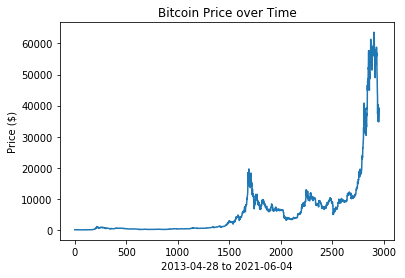

In [6]:
# using indices as dates
x = BTC.index
b_price = BTC.price
x_label = BTC.date.iloc[0] + ' to ' + BTC.date.iloc[-1]

plt.plot(x, b_price)
plt.xlabel(x_label)
plt.ylabel('Price ($)')
plt.title('Bitcoin Price over Time')

Text(0.5, 1.0, 'Bitcoin Market Cap over Time')

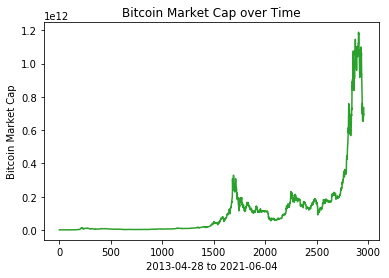

In [7]:
b_cap = BTC.market_cap

plt.plot(x, b_cap, 'tab:green')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Market Cap')
plt.title('Bitcoin Market Cap over Time')

Text(0.5, 1.0, 'Bitcoin Total Volume over Time')

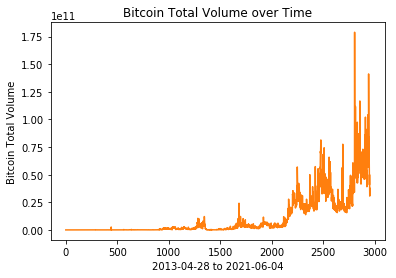

In [8]:
b_volume = BTC.total_volume

plt.plot(x, b_volume, 'tab:orange')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Total Volume')
plt.title('Bitcoin Total Volume over Time')

## Doge Dataset

In [9]:
DOGE = pd.read_csv (r'doge-usd-max.csv')
DOGE.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
1,2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0
2,2013-12-18 00:00:00 UTC,0.000268,2191987.0,0.0
3,2013-12-19 00:00:00 UTC,0.000475,4299422.0,0.0
4,2013-12-20 00:00:00 UTC,0.000989,9866232.0,0.0


In [10]:
# rename snapped_at to date
DOGE = DOGE.rename(columns={'snapped_at':'date'})
# strip string in snapped_at to remove time
DOGE['date'] = DOGE['date'].str.split(' ', expand=True)[0]
DOGE.head()

,date,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [11]:
DOGE.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


In [12]:
start = DOGE.date.iloc[0]
end = DOGE.date.iloc[-1]
start, end

('2013-12-15', '2021-06-04')

Text(0.5, 1.0, 'DOGE Price over Time')

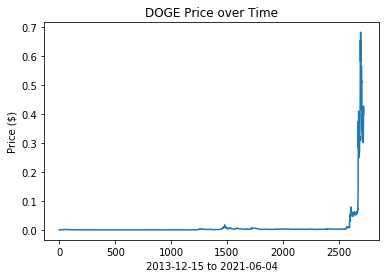

In [13]:
# using indices in replace of dates
x2=DOGE.index
x2_label = start + ' to ' + end

plt.plot(x2,DOGE.price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

#### Since there hasn't been much fluctuation in Doge for the first 2500 observation points, we are only interested in observations that show more activity when the price is greater than a certain threshold. Doge only seems to begin having more significant changes in price when price is around $0.07, so decided to set that as the threshold.

In [14]:
threshold = 0.07
doge = DOGE.loc[DOGE.price >= threshold]
doge.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


In [15]:
doge = doge.reset_index()
doge.head()

,index,date,price,market_cap,total_volume
0,2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
1,2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2,2612,2021-02-11,0.072987,9.381046e+09,6.304019e+09
3,2672,2021-04-12,0.074646,9.687277e+09,6.594981e+09
4,2673,2021-04-13,0.071024,9.196725e+09,2.913823e+09


In [16]:
doge.tail()

,index,date,price,market_cap,total_volume
52,2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
53,2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
54,2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
55,2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
56,2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


In [17]:
start = doge.date.iloc[0]
end = doge.date.iloc[-1]
start, end

('2021-02-08', '2021-06-04')

Text(0.5, 1.0, 'DOGE Price over Time')

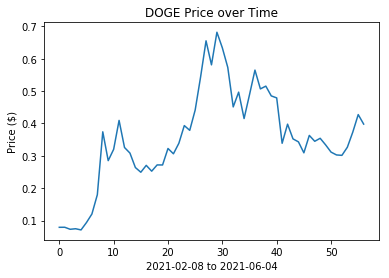

In [18]:
doge_x2 = doge.index
d_price = doge.price

x2_label = start + ' to ' + end
plt.plot(doge_x2, d_price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

Text(0.5, 1.0, 'DOGE Market Cap over Time')

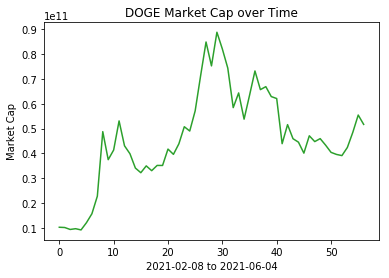

In [19]:
d_cap = doge.market_cap

plt.plot(doge_x2, d_cap, 'tab:green')
plt.xlabel(x2_label)
plt.ylabel('Market Cap')
plt.title('DOGE Market Cap over Time')

Text(0.5, 1.0, 'DOGE Total Volume over Time')

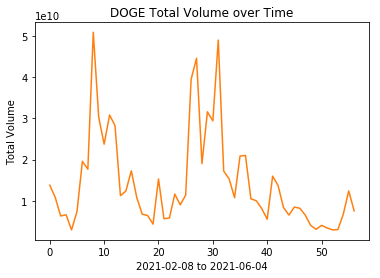

In [20]:
d_volume=doge.total_volume

plt.plot(doge_x2, d_volume,'tab:orange')
plt.xlabel(x2_label)
plt.ylabel('Total Volume')
plt.title('DOGE Total Volume over Time')

# Model Selection: Multiple Polynomial Regression
Goal: select the model with the lowest cross-validated test MSE (mean squared error) to balance bias/variance and prevent overfitting

> $CV_k = \frac{1}{k} \sum_{i=1}^{k} MSE_i$

## Leave-one-out cross-validation (LOOCV)
- Choose 1 data point to use for validation/test & train remaining (n-1) observations
- Repeat n times using a different observation point as the test each time
- Same as K-Fold when k=n

In [21]:
# use sklearn for k-fold (and loocv) cross-validation
from sklearn.model_selection import KFold

In [22]:
# cross-validation method returns the lowest train and test MSE and the polynomial model with the lowest test MSE
def cv(deg, k, dataset):
    kf = KFold(n_splits = k, shuffle = True, random_state = 0)
    mse_train = []
    mse_test = []
    models = []

    for train_i, val_i in kf.split(dataset):
        
        # y value used to fit polynomial model
        y_train = dataset.iloc[train_i,:].price
        y_test = dataset.iloc[val_i,:].price
        
        # step 1: train model with baseline model
        model = poly1d(polyfit(train_i, y_train, deg = deg))
        models.append(model)

        # step 2: fit test observation point to polynomial 
        yhat_train = model(train_i)
        yhat_test = model(val_i)

        # step 3: append MSEs`
        diffsq_train = (y_train - yhat_train)**2
        diffsq_test = (y_test - yhat_test)**2
        
        mse_train.append(np.mean(diffsq_train))
        mse_test.append(np.mean(diffsq_test))
        
    # find the index with the lowest mse
    train_min = np.argmin(mse_train)
    test_min = np.argmin(mse_test)
    
    return mse_train[train_min], mse_test[test_min], models[test_min]

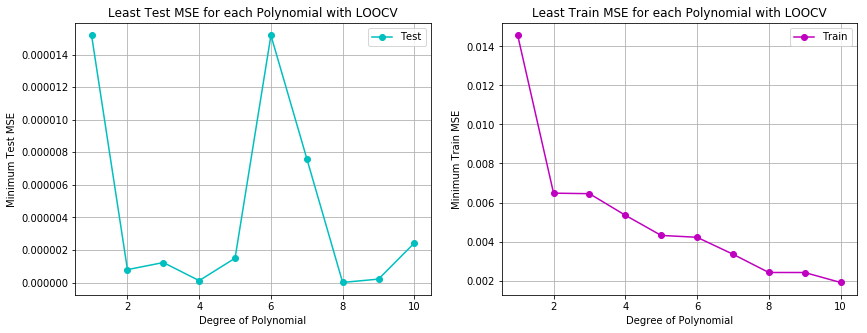

In [23]:
# create polynomial model for a range of degrees from 1 to 10
loocv_train_mse = []
loocv_model_min = []
loocv_test_mse = []
degrees = range(1,11)

for deg in degrees:
    # k = n for loocv
    k = len(doge)
    mse_train, mse_test, model = cv(deg, k, doge)
    
    loocv_train_mse.append(mse_train)
    loocv_model_min.append(model)
    loocv_test_mse.append(mse_test)
    
fig, axs = plt.subplots(1,2, figsize=(14,5))
    
axs[0].plot(degrees, loocv_test_mse, '-co', label='Test')
axs[0].set_xlabel("Degree of Polynomial")
axs[0].set_ylabel("Minimum Test MSE")
axs[0].set_title('Least Test MSE for each Polynomial with LOOCV')
axs[0].legend()

axs[1].plot(degrees, loocv_train_mse, '-mo', label='Train')
axs[1].set_xlabel("Degree of Polynomial")
axs[1].set_ylabel("Minimum Train MSE")
axs[1].set_title('Least Train MSE for each Polynomial with LOOCV')
axs[1].legend()

axs[0].grid()
axs[1].grid()

Polynomial degree with the lowest test MSE: 8


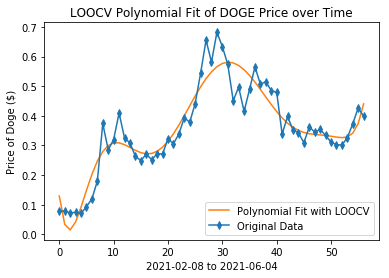

In [40]:
# find index of lowest mse out of all the polynomial degrees
loocv_index = np.argmin(loocv_test_mse)

# find the polynomial model with the lowest test mse 
loocv_model = loocv_model_min[loocv_index]
print("Polynomial degree with the lowest test MSE: %d" % (loocv_index+1))

# price of doge from the best polynomial degree model
y_model = loocv_model(doge_x2)

plt.plot(doge_x2, y_model, 'tab:orange', label="Polynomial Fit with LOOCV")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')

# plot original price of Doge
plt.plot(doge_x2, d_price, '-d', markersize=5, label="Original Data")
plt.xlabel(x2_label)
plt.title('LOOCV Polynomial Fit of DOGE Price over Time')

plt.legend()

In [25]:
# lowest test mse and best polynomial model with loocv
loocv_test_mse[loocv_index], loocv_model

(3.5869326114161274e-09,
 poly1d([ 1.60052676e-11, -3.78852922e-09,  3.66005523e-07, -1.84754529e-05,
         5.17610077e-04, -7.87931725e-03,  5.86888947e-02, -1.46870349e-01,
         1.29658609e-01]))

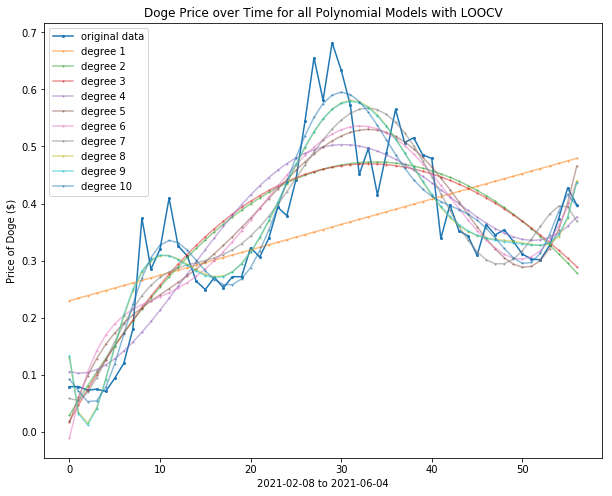

In [45]:
# plot models of all the polynomial degrees
plt.figure(figsize=(10,8))
plt.plot(doge_x2, d_price, '-o', markersize=2, label="original data")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')
plt.title('Doge Price over Time for all Polynomial Models with LOOCV')

for x in range(len(loocv_model_min)):
    # plot each loocv model with lowest test mse
    m = loocv_model_min[x]
    y_doge = m(range(len(doge)))
    plt.plot(doge_x2, y_doge, '-o', markersize=1.2, label='degree %s' % (x+1), alpha=0.5)
    
plt.legend()

#### Note that there is approximately a 2 month gap between the second and third data point since we are only plotting observations that reach a certain price threshold to get a better.

## k-Fold cross-validation
- Randomly assign each data point to one of k data subsets/folds
- Choose one fold as test set & train remaining (k-1) folds
- Same as LOOCV when k=n

### Perform K = 10 for 10-Fold Cross-Validation

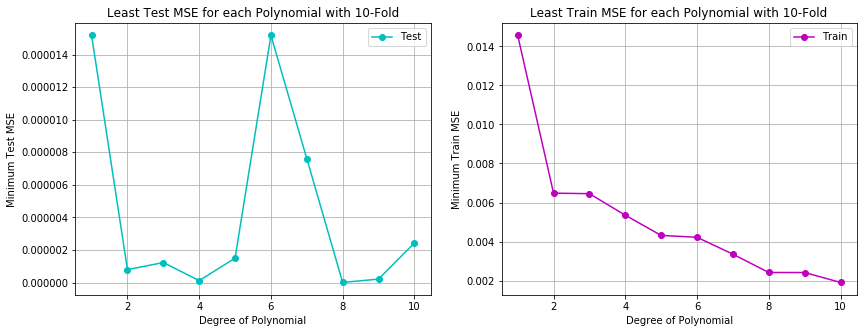

In [34]:
# create polynomial model for a range of degrees from 1 to 10
k_train_mse = []
k_model_min = []
k_test_mse = []
degrees = range(1,11)

for deg in degrees:
    # k = n for loocv
    k = 10
    mse_train, mse_test, model = cv(deg, k, doge)
    
    k_train_mse.append(mse_train)
    k_model_min.append(model)
    k_test_mse.append(mse_test)
    
fig, axs = plt.subplots(1,2, figsize=(14,5))
    
axs[0].plot(degrees, loocv_test_mse, '-co', label='Test')
axs[0].set_xlabel("Degree of Polynomial")
axs[0].set_ylabel("Minimum Test MSE")
axs[0].set_title('Least Test MSE for each Polynomial with 10-Fold')
axs[0].legend()

axs[1].plot(degrees, loocv_train_mse, '-mo', label='Train')
axs[1].set_xlabel("Degree of Polynomial")
axs[1].set_ylabel("Minimum Train MSE")
axs[1].set_title('Least Train MSE for each Polynomial with 10-Fold')
axs[1].legend()

axs[0].grid()
axs[1].grid()

Polynomial degree with the lowest test MSE: 8


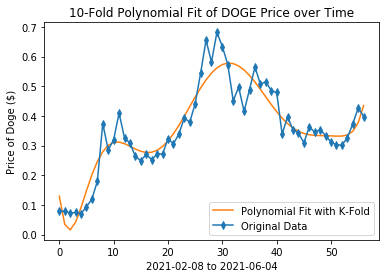

In [41]:
# find index of lowest mse with 10-fold cv out of all the polynomial degrees
k_index = np.argmin(loocv_test_mse)

# find the polynomial model with the lowest test mse 
k_model = k_model_min[k_index]
print("Polynomial degree with the lowest test MSE: %d" % (k_index+1))

# price of doge from the best polynomial degree model
y_model = k_model(doge_x2)

plt.plot(doge_x2, y_model, 'tab:orange', label="Polynomial Fit with K-Fold")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')

# plot original price of Doge
plt.plot(doge_x2, d_price, '-d', markersize=5, label="Original Data")
plt.xlabel(x2_label)
plt.title('10-Fold Polynomial Fit of DOGE Price over Time')

plt.legend()

In [42]:
# lowest test mse and best polynomial model with k-fold for k= 10
k_test_mse[k_index], k_model

(0.0006184176423656353,
 poly1d([ 1.51280315e-11, -3.60178133e-09,  3.50027129e-07, -1.77754641e-05,
         5.01099145e-04, -7.67840030e-03,  5.75957863e-02, -1.44882138e-01,
         1.29287500e-01]))

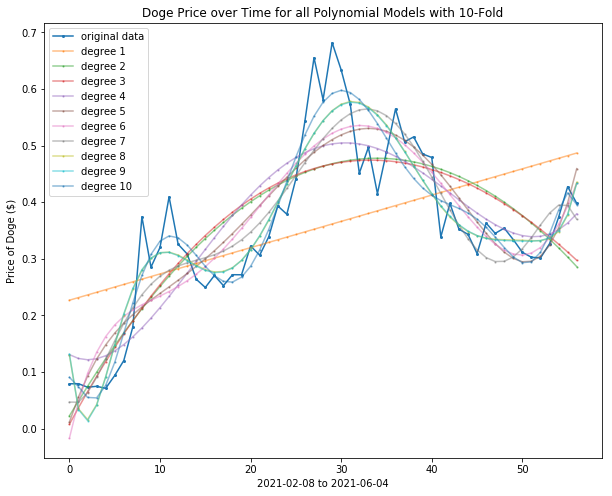

In [44]:
# plot models of all the polynomial degrees
plt.figure(figsize=(10,8))
plt.plot(doge_x2, d_price, '-o', markersize=2, label="original data")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')
plt.title('Doge Price over Time for all Polynomial Models with 10-Fold')

for x in range(len(k_model_min)):
    # plot each loocv model with lowest test mse
    m = k_model_min[x]
    y_doge = m(range(len(doge)))
    plt.plot(doge_x2, y_doge, '-o', markersize=1.2, label='degree %s' % (x+1), alpha=0.5)
    
plt.legend()

# Model Estimation
* can get confidence intervals and show standard error bars